# Import Libraries

In [10]:
%matplotlib inline
import numpy as np
import sys
import nibabel as nib

# Download Data

run download-data.sh before executing the notebook

# run searchlight SRM

In [12]:
! mpirun -n 16 python3 searchlightsrm_time_segment_matching.py

[[[ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.          0.          0.
    0.          0.          0.        ]
  [ 0.          0.          0.          0.      

# Get Whole Brain Mask

In [2]:
wbmask_fname = 'data/mask/MNI152_T1_3mm_brain_mask.nii'
mask = nib.load(wbmask_fname)
affine = mask.affine
mask = mask.get_data()
zeromaskidx = mask <= 0

# Get Accuracy Map

In [3]:
acc_path = 'data/sherlock/searchlight_srm_tsm_acc.npz'
acc_file = np.load(acc_path)
acc_map = acc_file['acc']

# Map to MNI Space

In [4]:
# Parameters
ds = 6 #downsampled by 6
mni_shape = [61,73,61]
min_size  = [1,7,0] # min and max of nonzeros
max_size  = [59,65,58]

acc_mni = np.zeros_like(mask)

# mapping (make sure length of each dimension is a multiple of 'ds')
acc_mni[min_size[0]-1:max_size[0]+1, min_size[1]-1:max_size[1]+1, min_size[2]:max_size[2]+2] = \
acc_map.repeat(ds, axis=0).repeat(ds, axis=1).repeat(ds, axis=2)

# if no downsampling
#acc_mni[min_size[0]:max_size[0], min_size[1]:max_size[1], min_size[2]:max_size[2]] = acc_map

# mask
acc_mni[zeromaskidx] = 0

# Save accuracy map

In [5]:
out_path = 'data/sherlock/searchlight_srm_tsm_acc_mni.nii'
acc_img = nib.Nifti1Image(acc_mni, affine)
nib.save(acc_img, out_path)

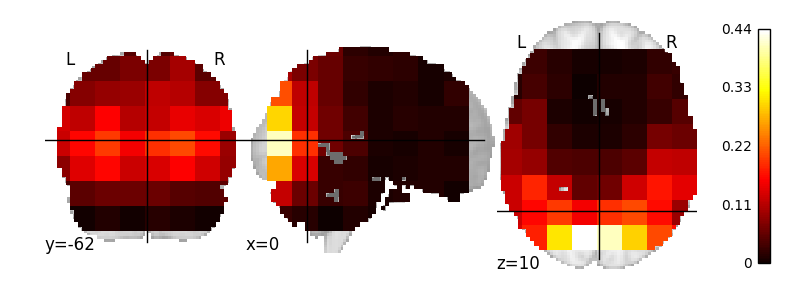

In [9]:
from nilearn import plotting
plotting.plot_stat_map(out_path)